In [312]:
import torch
import matplotlib.pyplot as plt

## Gradient tensor

In [263]:
grad_vec = torch.tensor([1,2,3], requires_grad=True, dtype=float)
grad_vec

tensor([1., 2., 3.], dtype=torch.float64, requires_grad=True)

In [264]:
vec_sqd=grad_vec**2
vec_sqd_sum=vec_sqd.sum()
vec_sqd_sum.backward()
grad_vec.grad


tensor([2., 4., 6.], dtype=torch.float64)

## Toy NN to map x to x^2

### Define inputs

In [265]:
x = torch.tensor(
    [i for i in range(0, 10_000, 2)],
    dtype=float,
)
y = torch.tensor(
    [i for i in range(0, 10_000, 2)],
    dtype=float,
)

x_test = torch.tensor(
    [i for i in range(1, 10_000, 2)],
    dtype=float,
)
y_test = torch.tensor(
    [i for i in range(1, 10_000, 2)],
    dtype=float,
)

### Define loss function

In [266]:
def mean_sq_error(y_hat, y):
    return ((y_hat-y)**2).mean()

### Define single layer network

In [267]:
lyr2 = torch.rand(2,5, dtype=float)-0.5
lyr2

tensor([[ 0.4640, -0.3754, -0.2064, -0.2680, -0.3541],
        [-0.4389, -0.0668, -0.0173,  0.3784,  0.0245]], dtype=torch.float64)

In [268]:
inputs = torch.stack([
    x,
    torch.ones_like(x)
]).transpose(0,1)
inputs

tensor([[0.0000e+00, 1.0000e+00],
        [2.0000e+00, 1.0000e+00],
        [4.0000e+00, 1.0000e+00],
        ...,
        [9.9940e+03, 1.0000e+00],
        [9.9960e+03, 1.0000e+00],
        [9.9980e+03, 1.0000e+00]], dtype=torch.float64)

In [269]:
preact = torch.matmul(inputs, lyr2)
preact.shape

torch.Size([5000, 5])

In [270]:
act = preact.relu()
act

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 3.7836e-01, 2.4459e-02],
        [4.8921e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4173e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        ...,
        [4.6372e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [4.6381e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [4.6391e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
       dtype=torch.float64)

In [271]:
y_hat = preact.sum(dim=1)
y_hat

tensor([-1.2013e-01, -1.5999e+00, -3.0797e+00,  ..., -7.3947e+03,
        -7.3962e+03, -7.3976e+03], dtype=torch.float64)

### Visualize layer

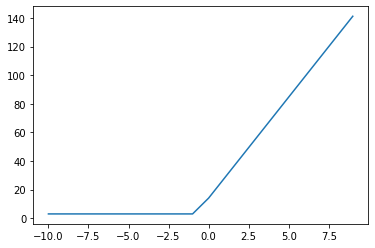

In [399]:
lyr1 = torch.rand(2,1, dtype=float)*5

def plot_layer(lyr):
    x=list(range(-10,10))
    y=torch.matmul(
        torch.stack([
            torch.tensor(x),
            torch.ones(len(x)),
        ]).transpose(0,1).to(float),
        lyr
    ).sum(dim=1).relu().detach()
    y=torch.matmul(
        torch.stack([
            y,
            torch.ones(len(y)),
        ]).transpose(0,1).to(float),
        lyr
    ).sum(dim=1).relu().detach()
    # print(x, y)
    plt.plot(x, y)
plot_layer(lyr1)

### Train

In [ ]:
# Gradient descent
lyr1 = torch.rand(2,2, dtype=float, requires_grad=True)

alpha = 0.0001
for epoch in range(5):
    y_hat = torch.matmul(inputs, lyr1).relu().sum(dim=1)
    # print(lyr1)
    loss = mean_sq_error(y_hat, y)
    print(y_hat[:5].tolist(), y[:5].tolist())
    loss.backward()
    print(loss.item())
    grad=lyr1.grad
    lyr1.data=lyr1.data-grad.data*alpha
    lyr1.grad.zero_()

[1.5822442063241886, 3.3154212858092076, 5.048598365294227, 6.781775444779246, 8.514952524264265] [0.0, 2.0, 4.0, 6.0, 8.0]
591001.3138649154
[1.8483808645725368, 3553.825566584592, 7105.802752304611, 10657.779938024632, 14209.75712374465] [0.0, 2.0, 4.0, 6.0, 8.0]
104988012550104.94
[0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 2.0, 4.0, 6.0, 8.0]
33323334.0
[0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 2.0, 4.0, 6.0, 8.0]
33323334.0
[0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 2.0, 4.0, 6.0, 8.0]
33323334.0


In [311]:
# SGD
lyr1 = torch.rand(2,1, dtype=float, requires_grad=True)

alpha = 0.0001
for epoch in range(5):
    for x_val, y_val in zip(x, y):
        input_tuple = torch.tensor([x_val, 1])
        y_hat = torch.matmul(input_tuple, lyr1).relu().sum()
        loss = mean_sq_error(y_hat, y_val)
        loss.backward()
        grad = lyr1.grad
        lyr1.data = lyr1.data-grad.data*alpha
        lyr1.grad.zero_()
    print(loss.item())

99960004.0
99960004.0
99960004.0
99960004.0
99960004.0
